In [1]:
import glob
import numpy as np
import pandas as pd 
import os

In [2]:
os.listdir('train/')

['ba',
 'ca',
 'da',
 'ga',
 'ha',
 'ja',
 'ka',
 'la',
 'ma',
 'na',
 'nga',
 'nya',
 'pa',
 'ra',
 'sa',
 'ta',
 'wa',
 'ya']

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array

In [4]:
def prepare_dataset(path):
    x_train=[]
    y_train=[]
    label = 0
    for labels in os.listdir(path):
        if labels == 'ka':
            label = 0
        elif labels == 'ca':
            label = 1
        elif labels == 'ta':
            label = 2
        elif labels == 'pa':
            label = 3
        elif labels == 'ya':
            label = 4
        elif labels == 'wa':
            label = 5
        elif labels == 'ga':
            label = 6
        elif labels == 'ja':
            label = 7
        elif labels == 'da':
            label = 8
        elif labels == 'ba':
            label = 9
        elif labels == 'ra':
            label = 10
        elif labels == 'sa':
            label = 11
        elif labels == 'nga':
            label = 12
        elif labels == 'nya':
            label = 13
        elif labels == 'na':
            label = 14
        elif labels == 'ma':
            label = 15
        elif labels == 'la':
            label = 16
        elif labels== 'ha':
            label = 17
            
        all_images_path=glob.glob(path+labels+'/*.jpg')
        for img_path in all_images_path :
                img=load_img(img_path, target_size=(150,150))
                img=img_to_array(img)
                img=img/255.0
                x_train.append(img)
                y_train.append(label)
    return np.array(x_train),np.array(y_train)

In [5]:
x_train, y_train = prepare_dataset('train/')

In [6]:
print("shape x_train",x_train.shape)
print("shape y_train",y_train.shape)

shape x_train (3780, 150, 150, 3)
shape y_train (3780,)


In [7]:
paths=glob.glob('train/*')
l=len('train/')
labels=[]
for path in paths:
    labels.append(path[l:])
    print(labels)

['ba']
['ba', 'ca']
['ba', 'ca', 'da']
['ba', 'ca', 'da', 'ga']
['ba', 'ca', 'da', 'ga', 'ha']
['ba', 'ca', 'da', 'ga', 'ha', 'ja']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma', 'na', 'nga', 'nya', 'pa', 'ra', 'sa', 'ta', 'wa']
['ba', 'ca', 'da', 'ga', 'ha', 'ja', 'ka', 'la', 'ma

In [8]:
x_test, y_test = prepare_dataset('test/')

In [33]:
def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma',
              16:'la', 17:'ha'}
    return labels[class_code]

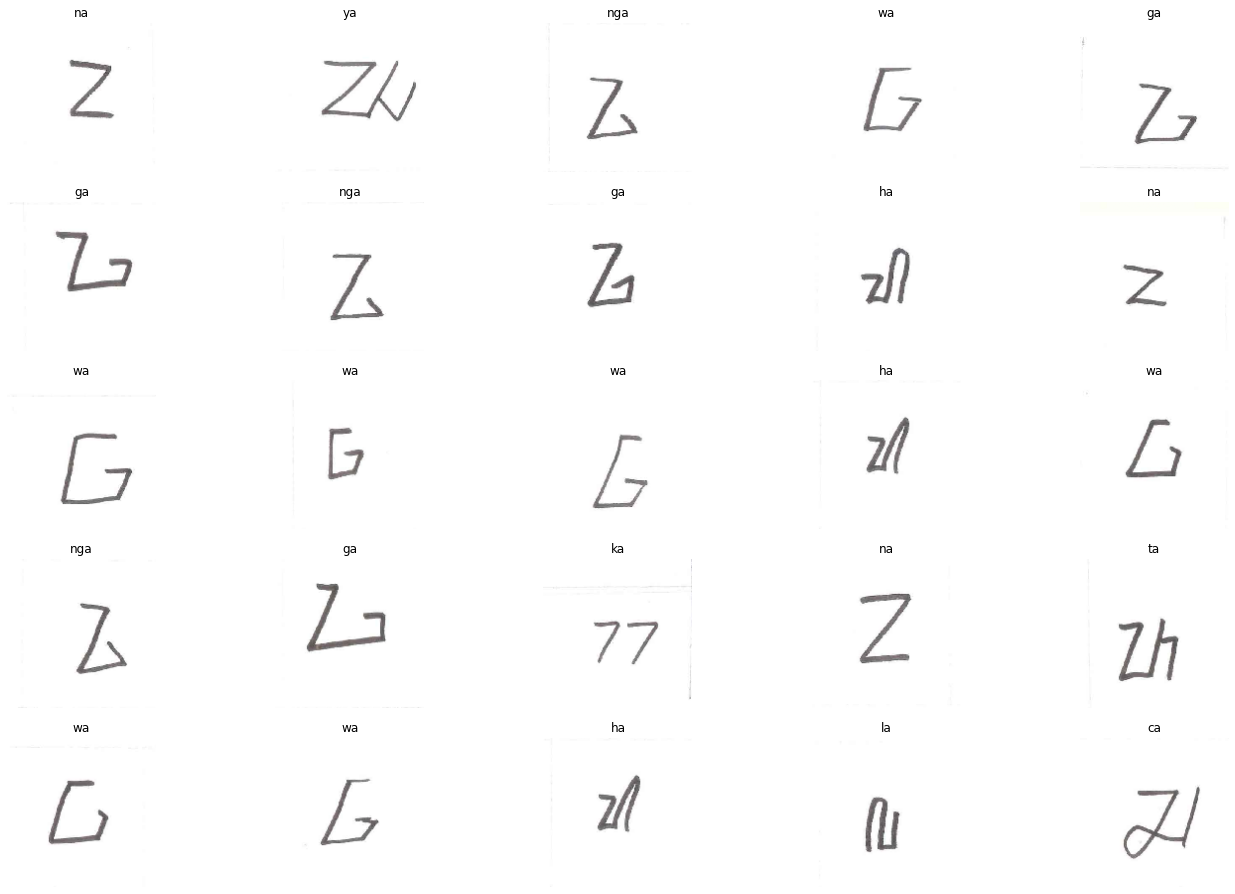

In [34]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
f,ax = plt.subplots(5,5) 
f.subplots_adjust(0,0,3,3)
for i in range(0,5,1):
    for j in range(0,5,1):
        rnd_number = randint(0,len(x_train))
        ax[i,j].imshow(x_train[rnd_number])
        ax[i,j].set_title(get_classlabel(y_train[rnd_number]))
        ax[i,j].axis('off')

In [10]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.optimizers import Adam

local_weights_file = 'D:/Belajar/skripsi/ngalegena/pretrained/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(local_weights_file)

for layer in pre_trained_model.layers:
     layer.trainable = False
        
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 74, 74, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 74, 74, 32)   96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 74, 74, 32)   0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [14]:
last_layer = pre_trained_model.get_layer('mixed4')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

x = layers.Flatten()(last_output)
x = layers.Dense(768, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense(18, activation='softmax')(x)           

model = Model(pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'sparse_categorical_crossentropy', 
              metrics = ['acc'])



last layer output shape:  (None, 7, 7, 768)


In [15]:
history=model.fit(x_train,y_train,epochs=7,validation_data=(x_test,y_test))

Train on 3780 samples, validate on 1620 samples
Epoch 1/7
3780/3780 [==============================] - 55s 15ms/sample - loss: 0.6049 - acc: 0.8233 - val_loss: 0.8269 - val_acc: 0.7679
Epoch 2/7
3780/3780 [==============================] - 51s 13ms/sample - loss: 0.0321 - acc: 0.9950 - val_loss: 0.4311 - val_acc: 0.8809
Epoch 3/7
3780/3780 [==============================] - 51s 13ms/sample - loss: 0.0140 - acc: 0.9968 - val_loss: 0.3595 - val_acc: 0.9056
Epoch 4/7
3780/3780 [==============================] - 51s 13ms/sample - loss: 0.0039 - acc: 1.0000 - val_loss: 0.3573 - val_acc: 0.8981
Epoch 5/7
3780/3780 [==============================] - 51s 13ms/sample - loss: 0.0507 - acc: 0.9865 - val_loss: 0.5908 - val_acc: 0.8389
Epoch 6/7
3780/3780 [==============================] - 51s 13ms/sample - loss: 0.0082 - acc: 0.9984 - val_loss: 0.4986 - val_acc: 0.8525
Epoch 7/7
3780/3780 [==============================] - 51s 13ms/sample - loss: 0.0027 - acc: 0.9997 - val_loss: 0.2605 - val_acc: 

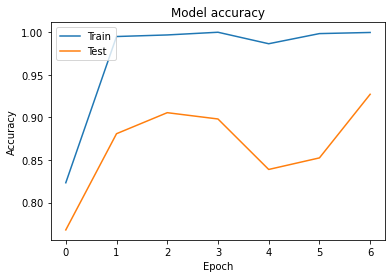

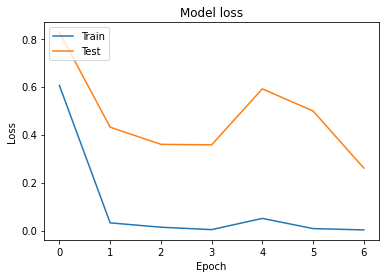

In [17]:
import matplotlib.pyplot as plt
from random import randint
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [18]:
def pred_dataset(path):
    x_train=[]
    all_images_path=glob.glob(path+'/*.jpg')
    for img_path in all_images_path :
            img=load_img(img_path, target_size=(150,150))
            img=img_to_array(img)
            img=img/255.0
            x_train.append(img)
    return np.array(x_train)

In [19]:
pred_img = pred_dataset('pred/aPredic/')
pred_img.shape

(270, 150, 150, 3)

In [ ]:
predictions = model.predict(pred_img)

In [35]:
def get_classlabel(class_code):
    labels = {0:'ka', 1:'ca', 2:'ta', 3:'pa', 4:'ya', 5:'wa', 6:'ga', 7:'ja', 8:'da',
              9:'ba', 10:'ra', 11:'sa', 12:'nga', 13:'nya', 14:'na', 15:'ma', 16:'la', 17:'ha'}
    classl = labels[class_code]
    
    return classl

C:\Users\ridho\.conda\envs\skripsi\lib\site-packages\ipykernel_launcher.py:22: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


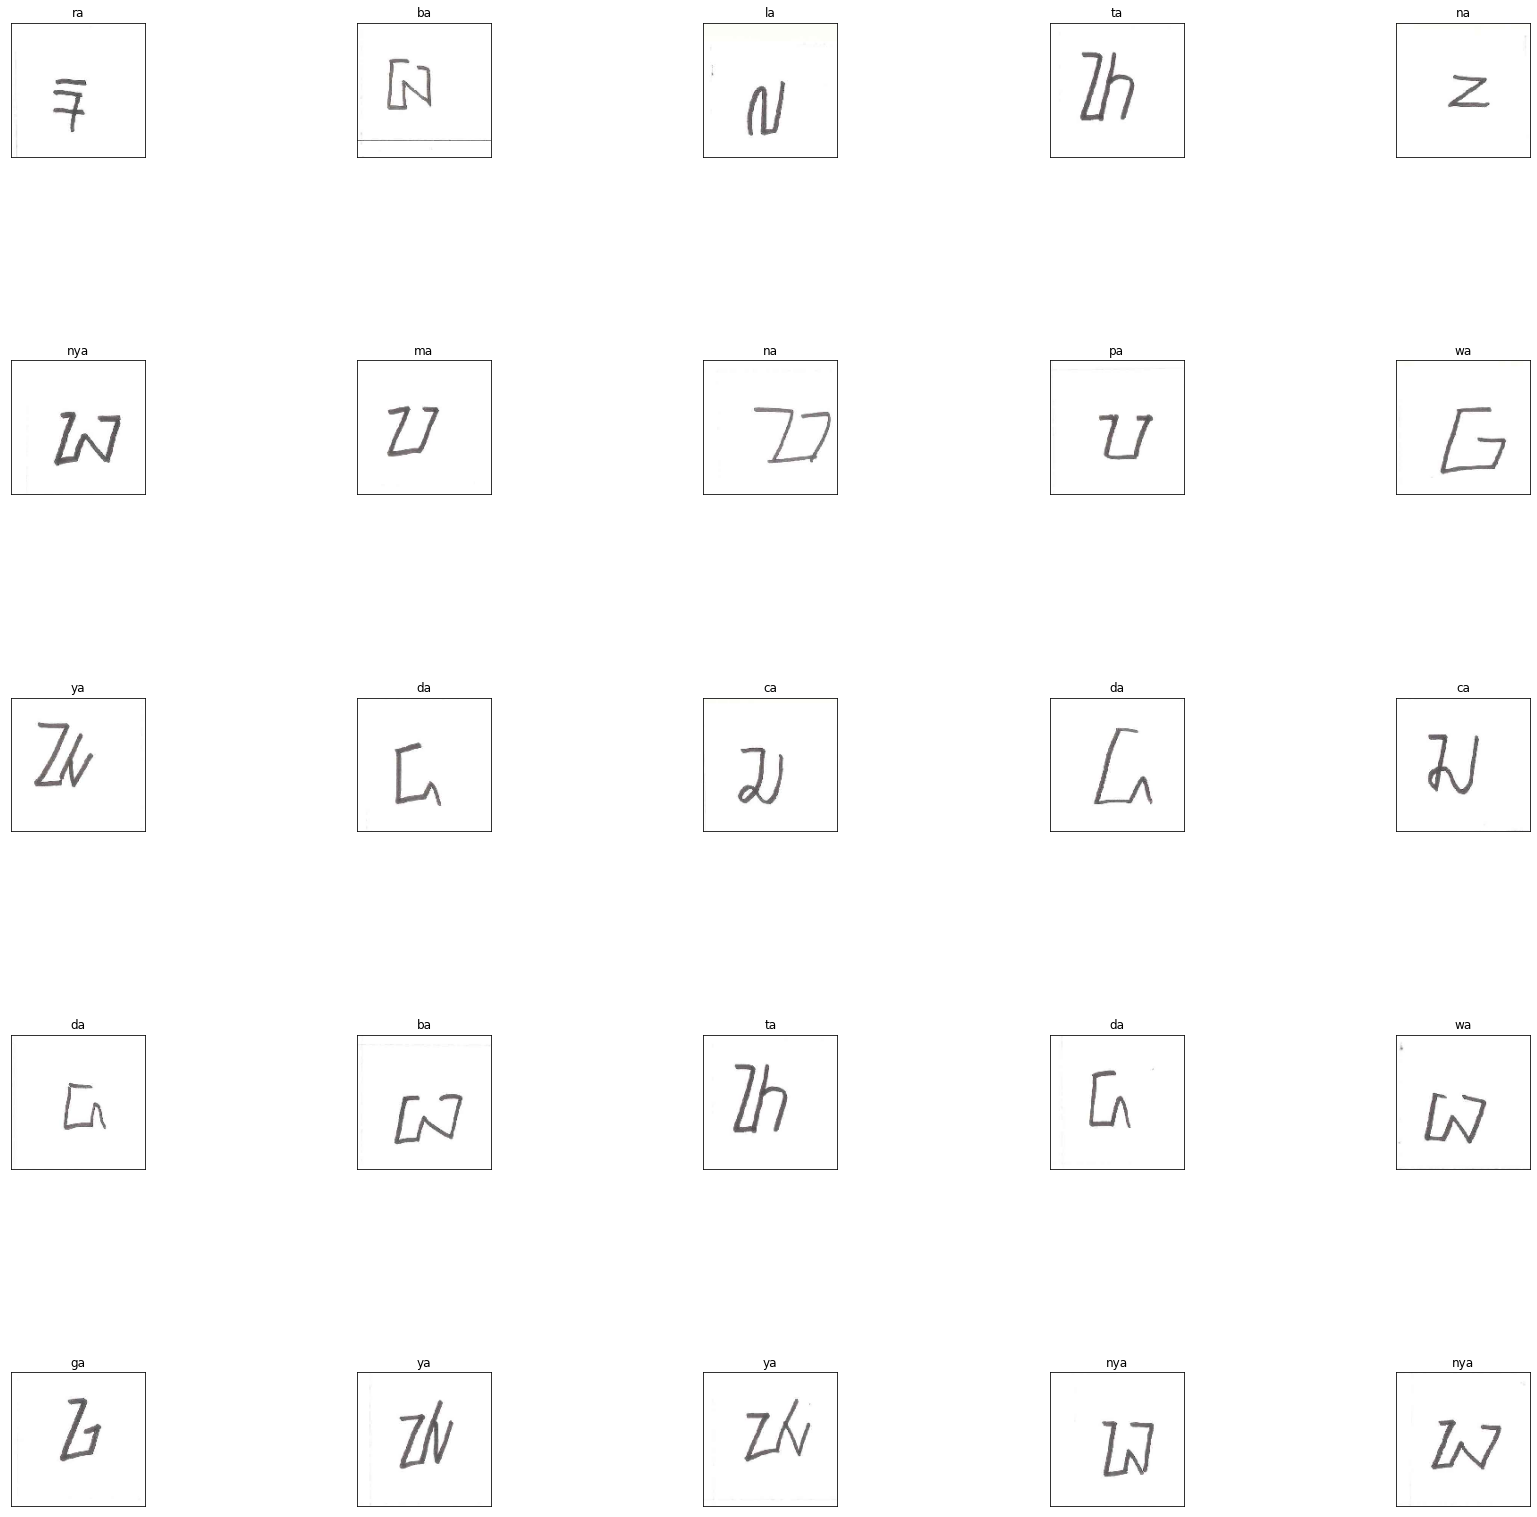

In [37]:
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
from random import randint
fig = plt.figure(figsize=(30, 30))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_img))
    pred_image = np.array([pred_img[rnd_number]])
    x = np.argmax(model.predict(pred_image)[0])
    for j in range(2):
        if (j%2) == 0:
            ax = plt.Subplot(fig, inner[j])
            ax.imshow((pred_image[0]*255).astype(np.uint8))
            ax.set_title(get_classlabel(x))
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)


fig.show()

In [36]:
get_classlabel(2)

'ta'